In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import stats
from scipy.stats import *
import sympy as smp
import scipy as sp
from scipy.integrate import quad
from scipy.special import erf
from scipy.special import iv

In [4]:
#Acceptance-rejection method for normal from Laplace random variables 
n=np.power(10,6) #number of samples
c= np.sqrt(2*np.exp(1)/np.pi) #max(f/g)
deltax=0.1 #grid spacing
xmax=4 #grid bound
x=np.arange(-xmax,xmax+deltax,deltax) #grid

#Sample the normal distribution using the acceptance-rejection method
U1=np.random.rand(n)
L=np.log(2*U1)*(U1<0.5)-np.log(2*(1-U1))*(U1>=0.5)

#Sample the normal distribution using the acceptance-rejection method
g=0.5*np.exp(-np.abs(L))
f=1/np.sqrt(2*np.pi)*np.exp(-L**2/2)
U2=np.random.rand(n)
N=L[U2*c*g<=f]

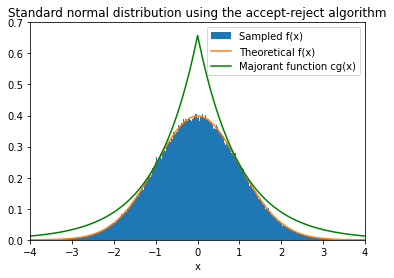

In [10]:
plt.figure(1)
x2=np.arange(-xmax-deltax/2,xmax+deltax/2,deltax/10) #bin edges
plt.hist(N,bins=x2,density=True,label='Sampled f(x)')
fx=1/np.sqrt(2*np.pi)*np.exp(-(x**2)/2)
gx=0.5*np.exp(-np.abs(x))
plt.plot(x,fx,label='Theoretical f(x)')
plt.plot(x,c*gx,'g',label='Majorant function cg(x)')
plt.ylim([0,0.7])
plt.xlim([-4,4])
plt.xlabel('x')
plt.legend()
plt.title('Standard normal distribution using the accept-reject algorithm')
plt.show()

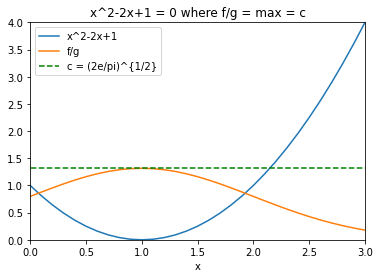

In [6]:
plt.figure(2)
plt.plot(x,x**2-2*x+1,label='x^2-2x+1')
plt.plot(x,fx/gx,label='f/g')
plt.plot(x,c*np.ones(np.size(x)),'--g',label='c = (2e/pi)^{1/2}')
plt.legend()
plt.xlim([0,3])
plt.ylim([0,4])
plt.title('x^2-2x+1 = 0 where f/g = max = c')
plt.xlabel('x')
plt.show()